In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
plt.style.use('ggplot')

In [2]:
os.getcwd()

'/media/li/数据/repos/CodingChallange/glassdoor'

In [3]:
df=pd.read_csv("ozan_p_pApply_intern_challenge_03_20_min.csv", encoding='utf8')

In [4]:
df.dtypes

title_proximity_tfidf          float64
description_proximity_tfidf    float64
main_query_tfidf               float64
query_jl_score                 float64
query_title_score              float64
city_match                     float64
job_age_days                   float64
apply                            int64
search_date_pacific             object
u_id                            object
mgoc_id                          int64
dtype: object

In [5]:
df.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,u_id,mgoc_id
0,0.000000,0.198377,0.000000,0.022545,0.014706,1.0,16.0,0,2018-01-24,5f42afe6-e7d0-4822-b95e-57ae0682fa24,10148
1,0.000000,0.000000,9.308552,0.005782,0.000003,-1.0,0.0,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
2,0.000000,0.000000,9.308552,0.005782,0.000003,-1.0,0.0,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
3,11.992127,0.118237,3.462835,0.017337,0.050844,0.0,23.0,0,2018-01-25,5f562c30-b0ad-45ec-9427-145624e0f34b,10039
4,8.298727,0.000000,0.000000,0.019160,0.018750,1.0,0.0,0,2018-01-23,5f5991c5-253f-4d30-aad1-2abfe9d50de3,-1


In [6]:
df.search_date_pacific=pd.to_datetime(df.search_date_pacific)
df.rename(columns={'apply':'Apply'}, inplace=True)

In [7]:
df.shape

(1200890, 11)

In [9]:
min(df.search_date_pacific)

Timestamp('2018-01-21 00:00:00')

In [10]:
df_train=df[df.search_date_pacific<='2018-01-26']

In [11]:
df_test=df[df.search_date_pacific=='2018-01-27']

In [12]:
df_train.shape[0]+df_test.shape[0]

1200890

In [13]:
sum(df.Apply)/len(df.Apply)

0.08993579761676757

Text(0,0.5,'Frequency')

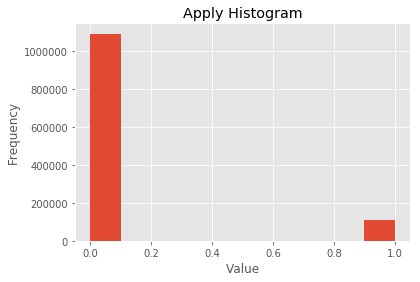

In [14]:
plt.hist(df.Apply)
plt.title("Apply Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [21]:
df.isnull().any()
#no missing values

title_proximity_tfidf          False
description_proximity_tfidf    False
main_query_tfidf               False
query_jl_score                 False
query_title_score              False
city_match                     False
job_age_days                   False
Apply                          False
search_date_pacific            False
u_id                           False
mgoc_id                        False
dtype: bool

In [22]:
X_train=df_train.iloc[:,0:7]
Y_train=df_train.Apply
X_test=df_test.iloc[:,0:7]
Y_test=df_test.Apply

In [23]:
X_train.columns

Index(['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match',
       'job_age_days'],
      dtype='object')

# SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train,Y_train)

In [52]:
clf

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
10    0
Name: Apply, dtype: int64

# NN based

In [24]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM,SimpleRNNCell
from keras.layers.embeddings import Embedding
from keras.wrappers.scikit_learn import KerasClassifier

/home/li/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
from keras.utils import np_utils
Y_test_nn=np_utils.to_categorical(Y_test,2)
Y_train_nn=np_utils.to_categorical(Y_train,2)

In [64]:
#Y_test_nn[1]
Y_test=Y_test.reset_index()

In [70]:
Y_test=Y_test.drop(columns="index")
Y_test.head(4)

,Apply
0,0
1,0
2,0
3,0


In [71]:
model=Sequential()
model.add(Dense(256,input_dim=7))
Activation('relu')
model.add(Dropout(0.25))
model.add(Dense(64,input_dim=256))
model.add(Dropout(0.25))
model.add(Dense(64,input_dim=256))
model.add(Dropout(0.25))
model.add(Dense(64,input_dim=256))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

In [72]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [73]:
X_train.shape

(1084364, 7)

In [74]:
model.fit(X_train,Y_train_nn,batch_size=200,epochs=5)

Epoch 1/5
1084364/1084364 [==============================] - 18s 17us/step - loss: 0.3150 - acc: 0.9086
Epoch 2/5
1084364/1084364 [==============================] - 18s 16us/step - loss: 0.3013 - acc: 0.9101
Epoch 3/5
1084364/1084364 [==============================] - 19s 17us/step - loss: 0.3008 - acc: 0.9101
Epoch 4/5
1084364/1084364 [==============================] - 18s 16us/step - loss: 0.3006 - acc: 0.9101
Epoch 5/5
1084364/1084364 [==============================] - 18s 16us/step - loss: 0.3005 - acc: 0.9101


In [75]:
score = model.evaluate(X_test, Y_test_nn, verbose=0)

In [76]:
score

[0.30158101599409975, 0.9091533220023202]

In [77]:
Y_pre_nn=model.predict_classes(X_test)
len(Y_pre_nn)

116526

In [78]:
#evaluate model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pre_nn)
confusion_matrix

array([[105940,      0],
       [ 10586,      0]])

In [102]:
#costune loss
def custom_objective(y_true, y_pred):
    '''Just another crossentropy'''
    
    tmpminus=(int(y_true)-int(y_pred))
    los=sum(tmpminus==True)*10+sum(tmpminus==-1)*1
    return np.sum(los)

In [105]:
int(Y_test.Apply)

TypeError: cannot convert the series to <class 'int'>

In [103]:
custom_objective(Y_pre_nn,Y_pre_nn)

TypeError: only size-1 arrays can be converted to Python scalars

In [94]:
model.compile(loss=custom_objective,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train,Y_train_nn,batch_size=200,epochs=5)

TypeError: 'bool' object is not iterable

In [54]:
Y_pre_nn=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pre_nn)
confusion_matrix


array([[105940,      0],
       [ 10586,      0]])

# Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
#evaluate model
Y_pred_logit = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_logit)
confusion_matrix

array([[105940,      0],
       [ 10586,      0]])

In [70]:
#predict probability
probY_test=LogReg.predict_proba(X_test)
Y_pred=LogReg.predict(X_test)

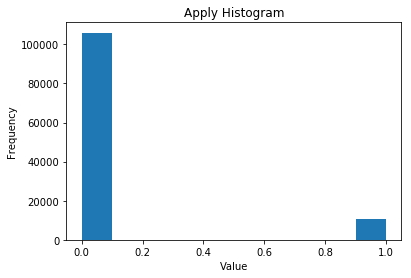

In [46]:
plt.hist(Y_test)
plt.title("Apply Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_logit)
metrics.auc(fpr, tpr)
#not good!!!!!!!

0.5

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [57]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [61]:
Y_pred_rd=clf.predict(X_test)


array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
sum(Y_pred_rd)

0

In [72]:
#evaluate model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_rd)
confusion_matrix

array([[105940,      0],
       [ 10586,      0]], dtype=int64)

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_rd)
metrics.auc(fpr, tpr)

0.5

In [68]:
#not good also...

array([ 0.,  1.])

# Single Tree based method


In [68]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth =1000,max_features=7)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1000,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [69]:
Y_pre_tree=clf.predict(X_test)

In [70]:
sum(Y_pre_tree)
#evaluate model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pre_tree)
confusion_matrix

array([[105421,    519],
       [ 10535,     51]])

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pre_tree)
metrics.auc(fpr, tpr)

0.4999593421497954

# Bayesian network

2